# Sequential Approximation

In [3]:
import matplotlib
from matplotlib import interactive
interactive(True)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys

In [2]:
# import core methods - Allow to run standalone in Google Collab
!git clone https://github.com/PML-UCF/SequentialResponseSurface.git
from SequentialResponseSurface.core import ResponseSurface, GenerateGrid, NewSamples

Cloning into 'SequentialResponseSurface'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 24 (delta 5), reused 17 (delta 4), pack-reused 0
Unpacking objects: 100% (24/24), done.
Checking connectivity... done.


ImportError: cannot import name 'NewSamples'

In [ ]:
# Mount Google Drive folder and create PML folder
from google.colab import drive
drive.mount('/content/drive/')

In [4]:
data = pd.read_excel('drive/My Drive/PML/doe.xlsx')

In [5]:
inputs = data[['x1','x2']]
output = data['y']

In [6]:
MyResponseSurface = ResponseSurface(inputs, output)

varlimits = np.array([[2,6],[.75,3]])
selectvar = [0,1]

Grid = GenerateGrid(MyResponseSurface, varlimits, selectvar)

/home/arinan/Recommissioning x Inspection/core.py:77: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.coef = np.linalg.lstsq(self.coef_matrix, output)[0]


In [ ]:
# Sequential Approximation

In [9]:
points = 10
new = NewSamples(inputs,output,varlimits,points)

In [ ]:
# Save DoE data to Google Drive PML folder
new.to_excel('drive/My Drive/PML/new_doe.xlsx')

In [ ]:
nptns = np.shape(data)[0]
new_inputs = new[['x1','x2']].values[nptns:nptns+points,:]
new_output = MyResponseSurface.predict(new_inputs)


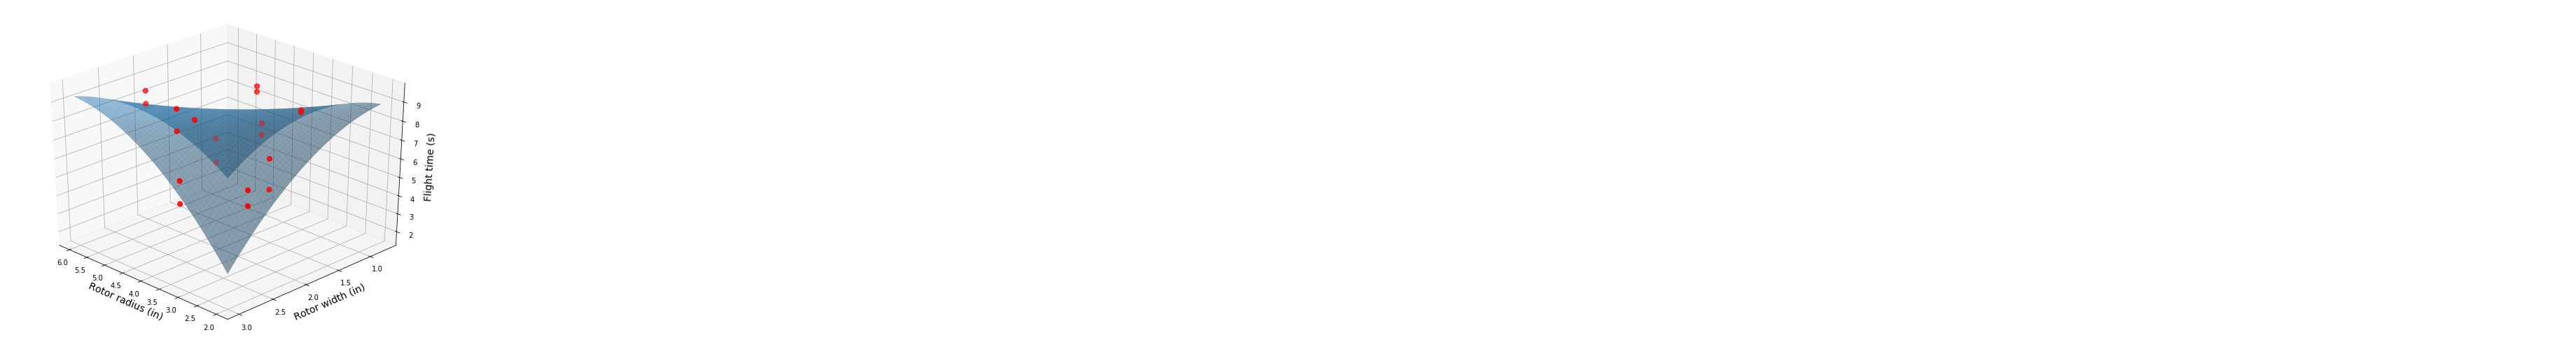

In [10]:
fig = plt.figure(figsize=(8.6, 6.6))
ax = Axes3D(fig)
ax.set_xlabel('Rotor radius (in)',fontsize = 14)
ax.set_ylabel('Rotor width (in)',fontsize = 14)
ax.set_zlabel('Flight time (s)',fontsize = 14)
ax.view_init(elev=None, azim=135)

ax.scatter(xs = inputs['x1'], ys = inputs['x2'], zs = output, s=50, c='r')
ax.view_init(elev=None, azim=135)

ax.plot_surface(Grid['input1'], Grid['input2'], Grid['output'], shade = True, alpha = 0.5)

Text(0, 0.5, 'Rotor width (in)')

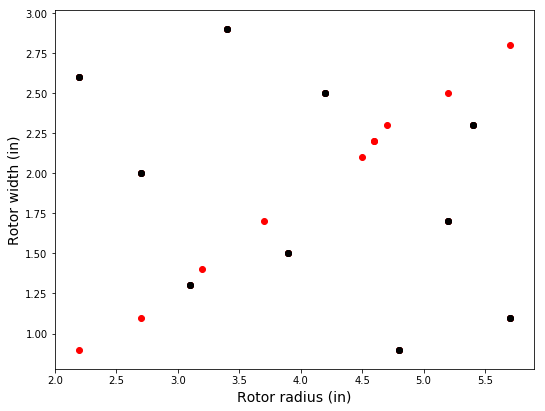

In [11]:
fig = plt.figure(figsize=(8.6, 6.6))
plt.scatter(new['x1'],new['x2'], color = 'k')
plt.scatter(inputs['x1'],inputs['x2'], color = 'r')
plt.xlabel('Rotor radius (in)',fontsize = 14)
plt.ylabel('Rotor width (in)',fontsize = 14)

In [ ]:
fig = plt.figure(figsize=(8.6, 6.6))
ax = Axes3D(fig)
ax.set_xlabel('Rotor radius (in)',fontsize = 14)
ax.set_ylabel('Rotor width (in)',fontsize = 14)
ax.set_zlabel('Flight time (s)',fontsize = 14)
ax.view_init(elev=None, azim=135)

ax.scatter(xs = inputs['x1'], ys = inputs['x2'], zs = output, s=50, c='r')
ax.scatter(xs = new_inputs[:,0], ys = new_inputs[:,1], zs = new_output, s=50, c='k')
ax.view_init(elev=None, azim=135)

ax.plot_surface(Grid['input1'], Grid['input2'], Grid['output'], shade = True, alpha = 0.5)